# Bike Sharing 

## Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Loading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('day.csv')
df2 = pd.read_csv('hour.csv')

In [3]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df1.shape

(731, 16)

In [6]:
df2.shape

(17379, 17)

In [7]:
df1.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df2.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Attribute information

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### 2. Find the count of the missing values and describe how you have handled the missing data.

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


We used dropna() to drop all the values having "null" value

In [11]:
df1_no_miss = df1.dropna()
df1_no_miss.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
df2_no_miss = df2.dropna()
df2_no_miss.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
df1_clean = df1.dropna(how='all')
df1_clean.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
df2_clean=df2.dropna(how='all')
df2_clean.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
df2.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in datasets.

## Univariate Analysis

### Histogram and KDE

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2D09526D8>,
      dtype=object)

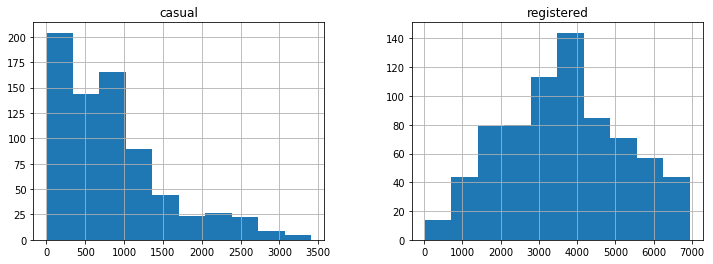

In [18]:
df1[['casual','registered']].hist(figsize=(12,4))

#### Observation:
In the above plot, we see that the variable registered is normally distributed, while casual is prominently skewed right.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2D11EC898>,
      dtype=object)

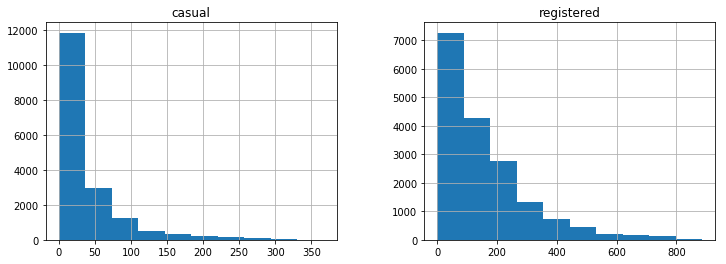

In [19]:
df2[['casual','registered']].hist(figsize=(12,4))

#### Observation
In the above plot, we see that the variable registered and casual both are prominently skewed right but casual is more skewed.

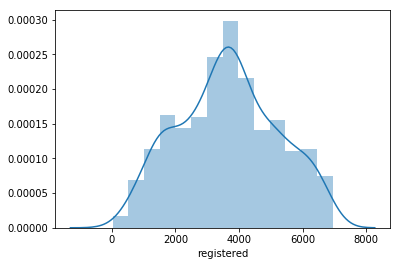

In [20]:
sns.distplot(df1['registered'])

#### Observation
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
Here the points out of the curve are considered outliers.

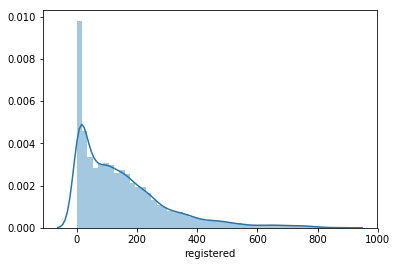

In [21]:
sns.distplot(df2['registered'])

#### Observation
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.Here the points out of the curve are considered outliers.

## Bivariate Analysis

In [22]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


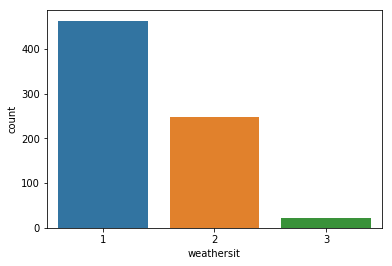

In [23]:
sns.countplot(df1['weathersit'])

Above plot tells that bike is shared most in clear weather rather than in Mist,Thunderstorm.

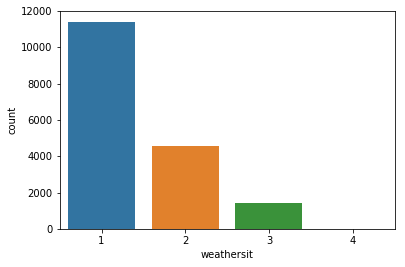

In [24]:
sns.countplot(df2['weathersit'])

Above plot tells that bike shared most in the hour of clear weather rather than in Mist,Thunderstorm.

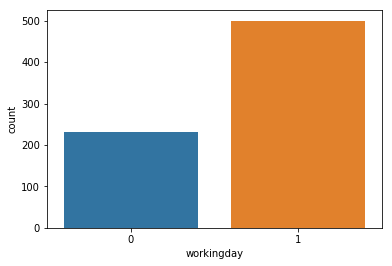

In [13]:
sns.countplot(df1['workingday'])

In the above plot we got to know that most riders rent the bike on a working day.

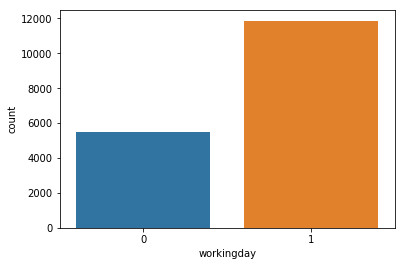

In [19]:
sns.countplot(df2['workingday'])

In [20]:
df1['per'] = (df1['weathersit']>2).astype('int')
df1['per'].value_counts()

0    710
1     21
Name: per, dtype: int64

We made another column that shows the count of people riding the bike even in Rains,Thunderstorm,Snow,Fog regularly

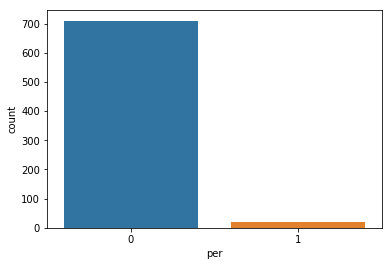

In [21]:
sns.countplot(df1['per'])

Above plot tells that majority of persons not rent/share the bike in extreme conditions like Rain,Thunderstorm,Snow,Fog etc.
Only 21 people uses in such conditions.

In [29]:
df2['perm'] = (df2['hr']>15).astype('int')
df2['perm'].value_counts()

0    11551
1     5828
Name: perm, dtype: int64

We made a column in which those members who ride bike more than 15 hours are stored.

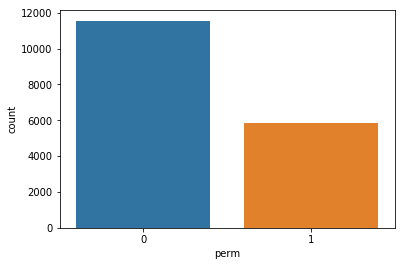

In [30]:
sns.countplot(df2['perm'])

In the above plot we got to know that only 5828 people ride/rent the bike for more than 15 hours a day.

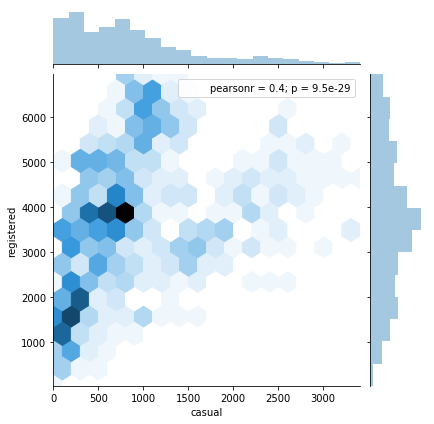

In [32]:
sns.jointplot(x='casual',y='registered',data=df1,kind='hex')

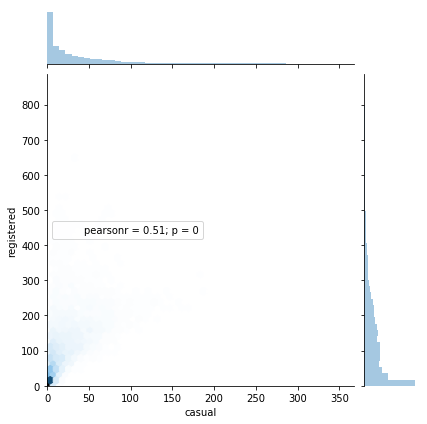

In [33]:
sns.jointplot(x='casual',y='registered',data=df2,kind='hex')

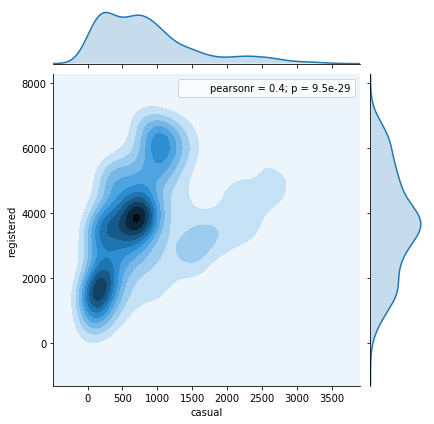

In [34]:
sns.jointplot(x='casual',y='registered',data=df1,kind='kde')

In the above graph we can see that registered are showing normal distribution while casual is skewed to right

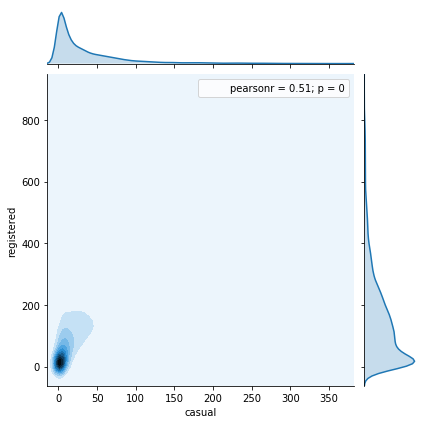

In [35]:
sns.jointplot(x='casual',y='registered',data=df2,kind='kde')

## Multivariate Analysis

In [37]:
df1.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
per             int32
dtype: object

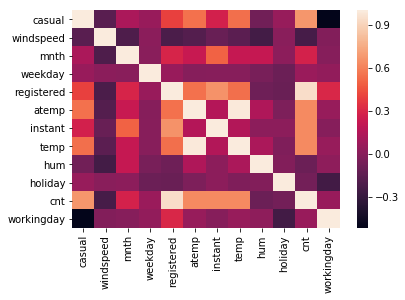

In [54]:
num_features = list(set(df1.columns)-set(['dteday','season',\
                                         'yr','month',\
                                         'weathersit','per']))
cor_mat = df1[num_features].corr()
sns.heatmap(cor_mat)

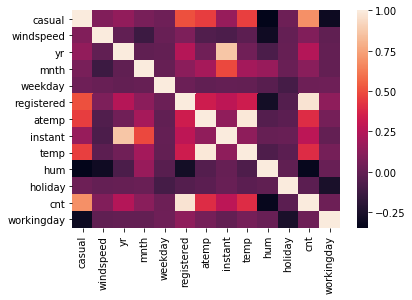

In [56]:
num_feature = list(set(df2.columns)-set(['dteday','season',\
                                         'hr','month',\
                                         'weathersit','perm']))
cor_mat = df2[num_feature].corr()
sns.heatmap(cor_mat)

In the above plot we get to know the variance,co relations of the columns that when value of one column increases what effect does it do on another column.

The bar on the right hand side of the graph tells us the lowest covariance value to highest value

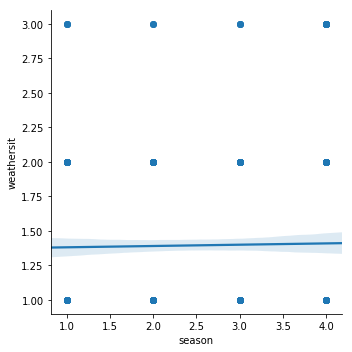

In [69]:
sns.lmplot('season', 'weathersit', data=df1)

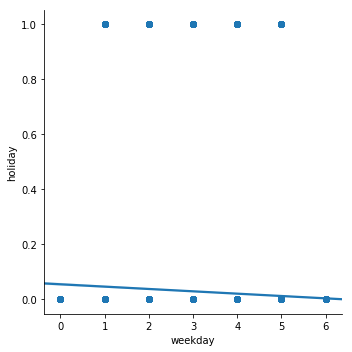

In [65]:
sns.lmplot('weekday', 'holiday', data=df2)

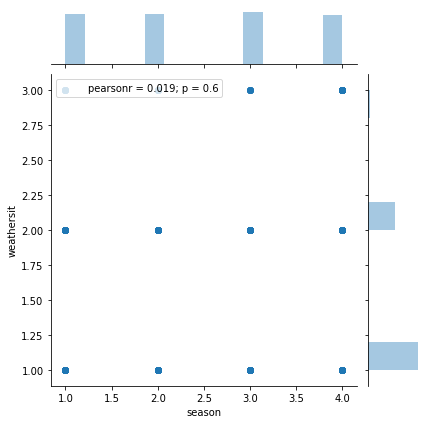

In [68]:
sns.jointplot(x='season',y='weathersit',data=df1,kind='scatter')

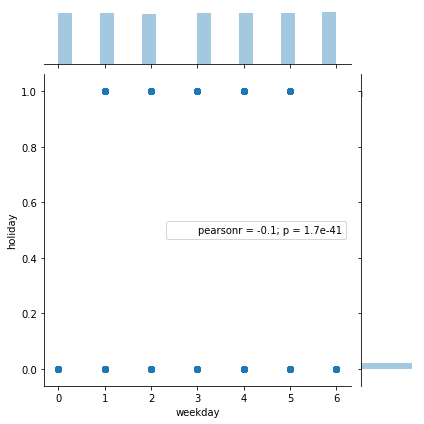

In [66]:
sns.jointplot(x='weekday',y='holiday',data=df2,kind='scatter')

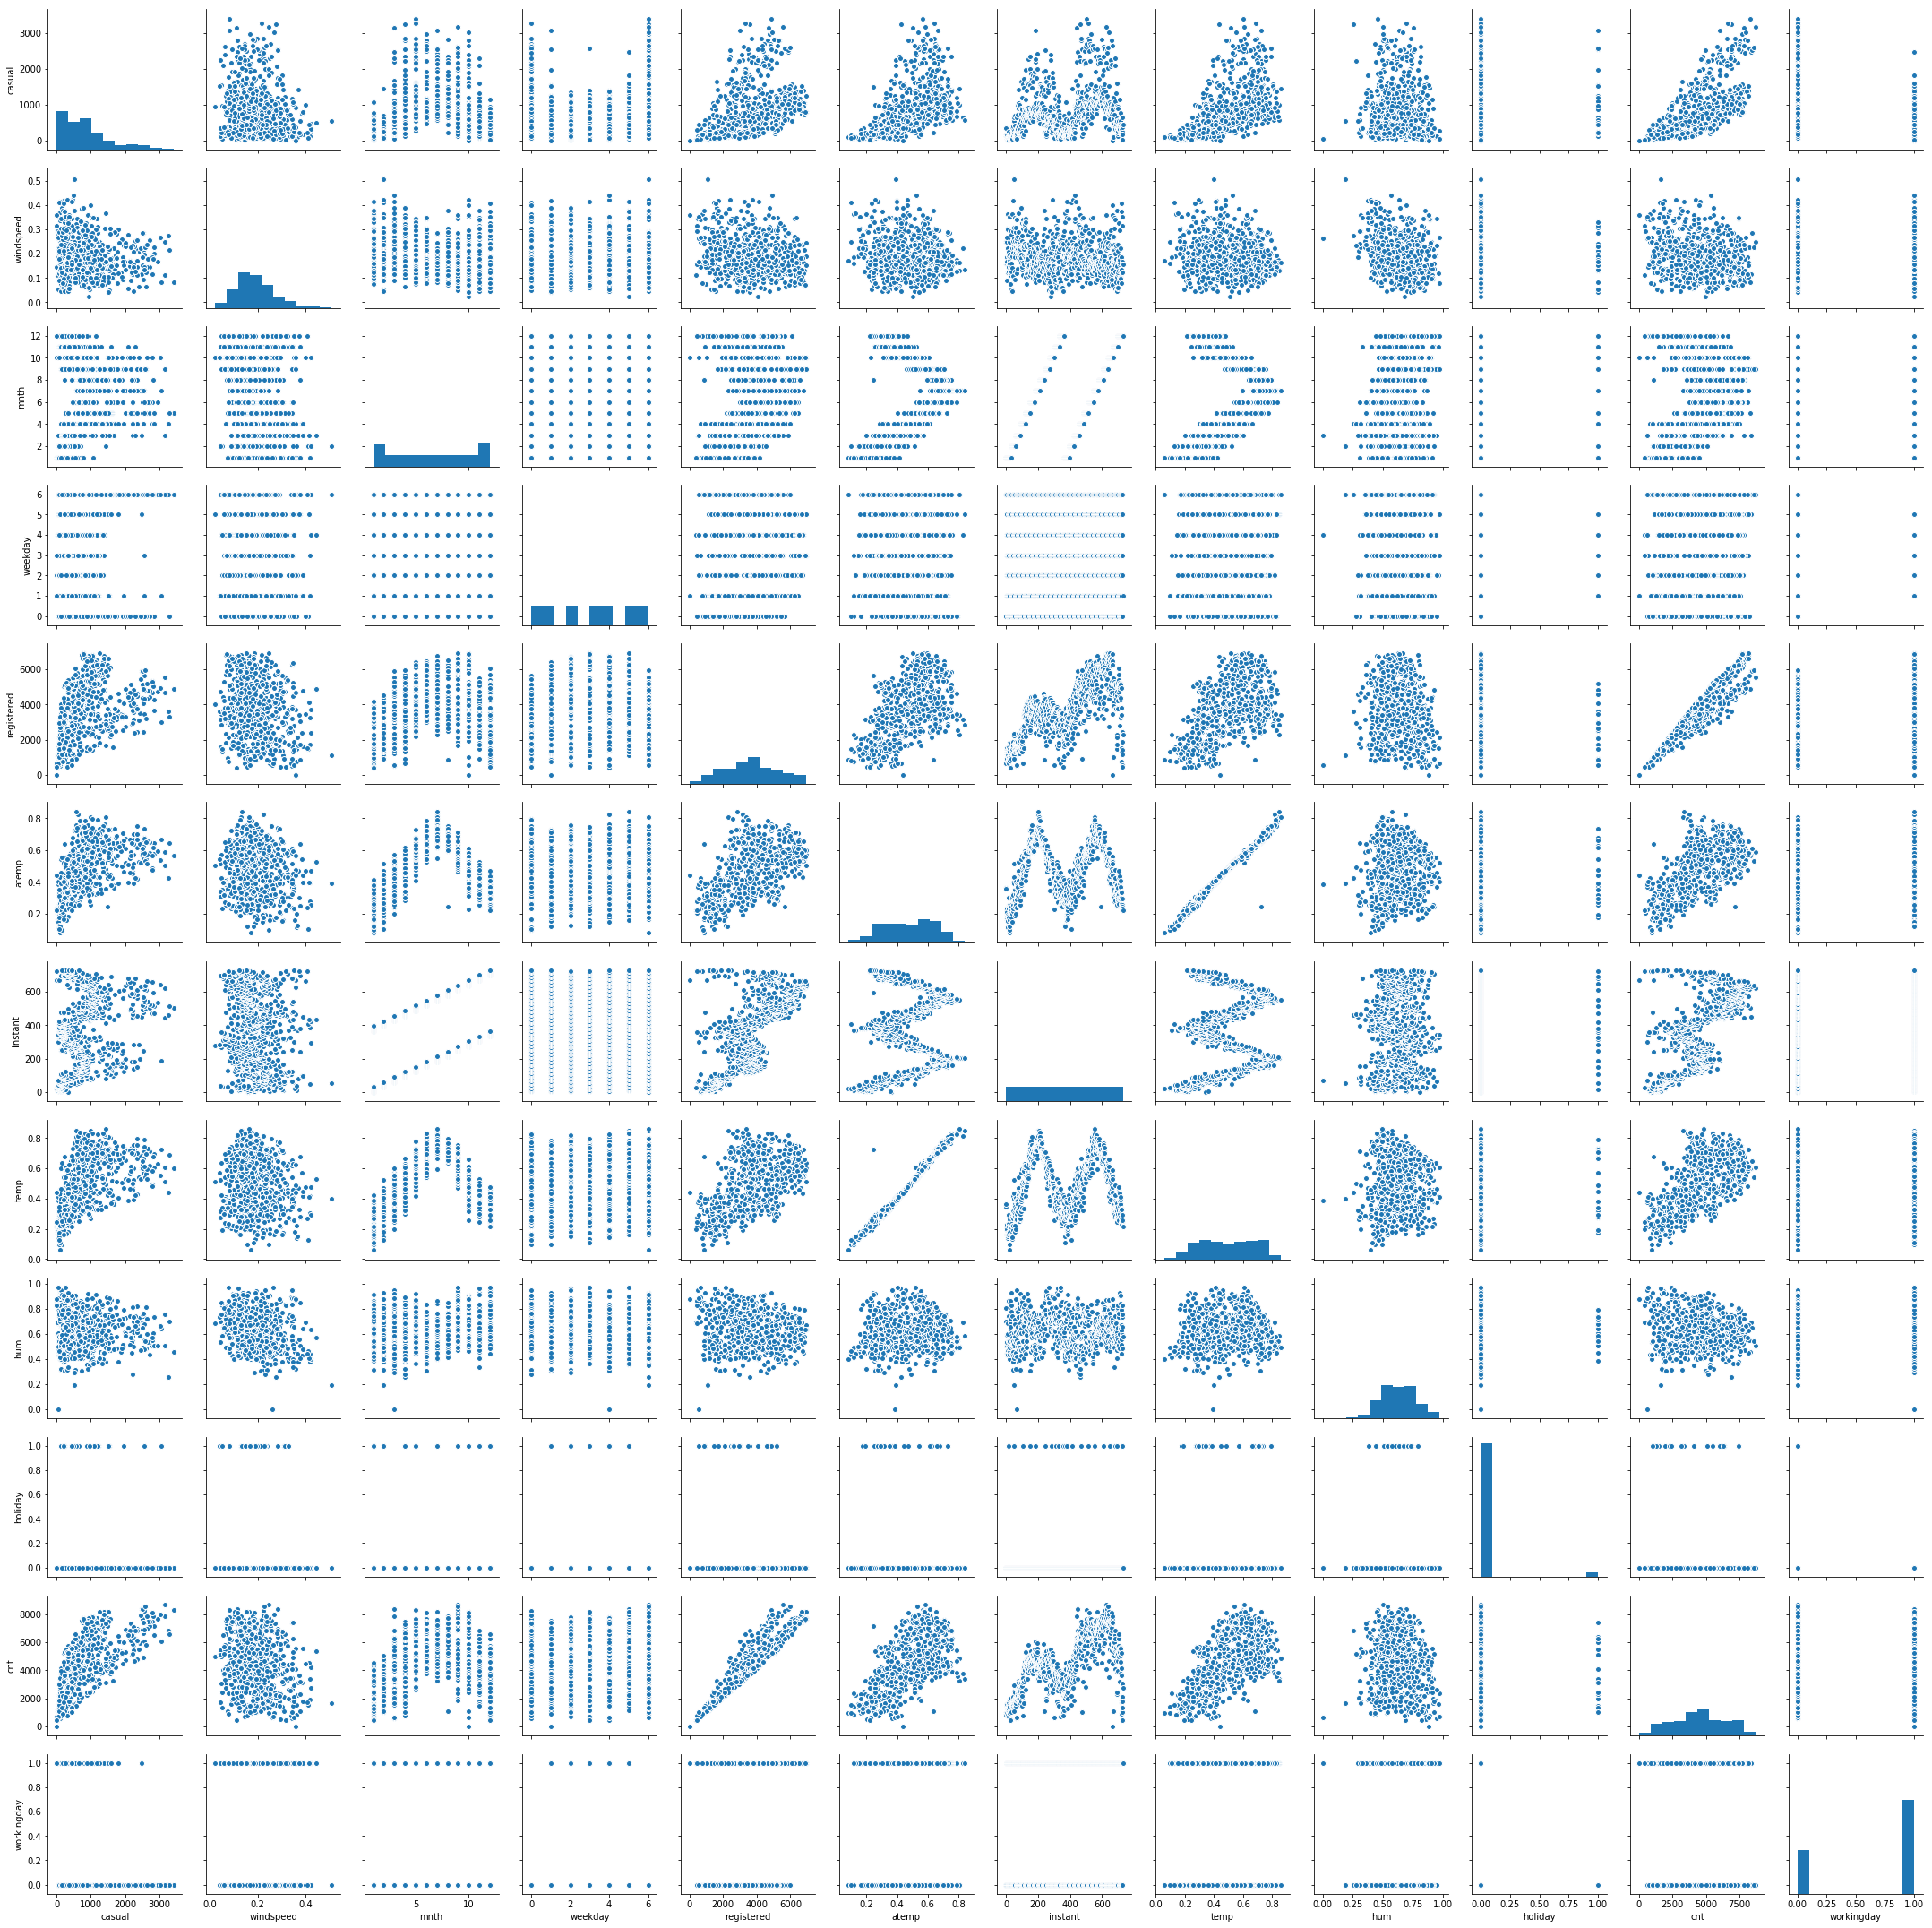

In [72]:
sns.pairplot(df1[num_features])

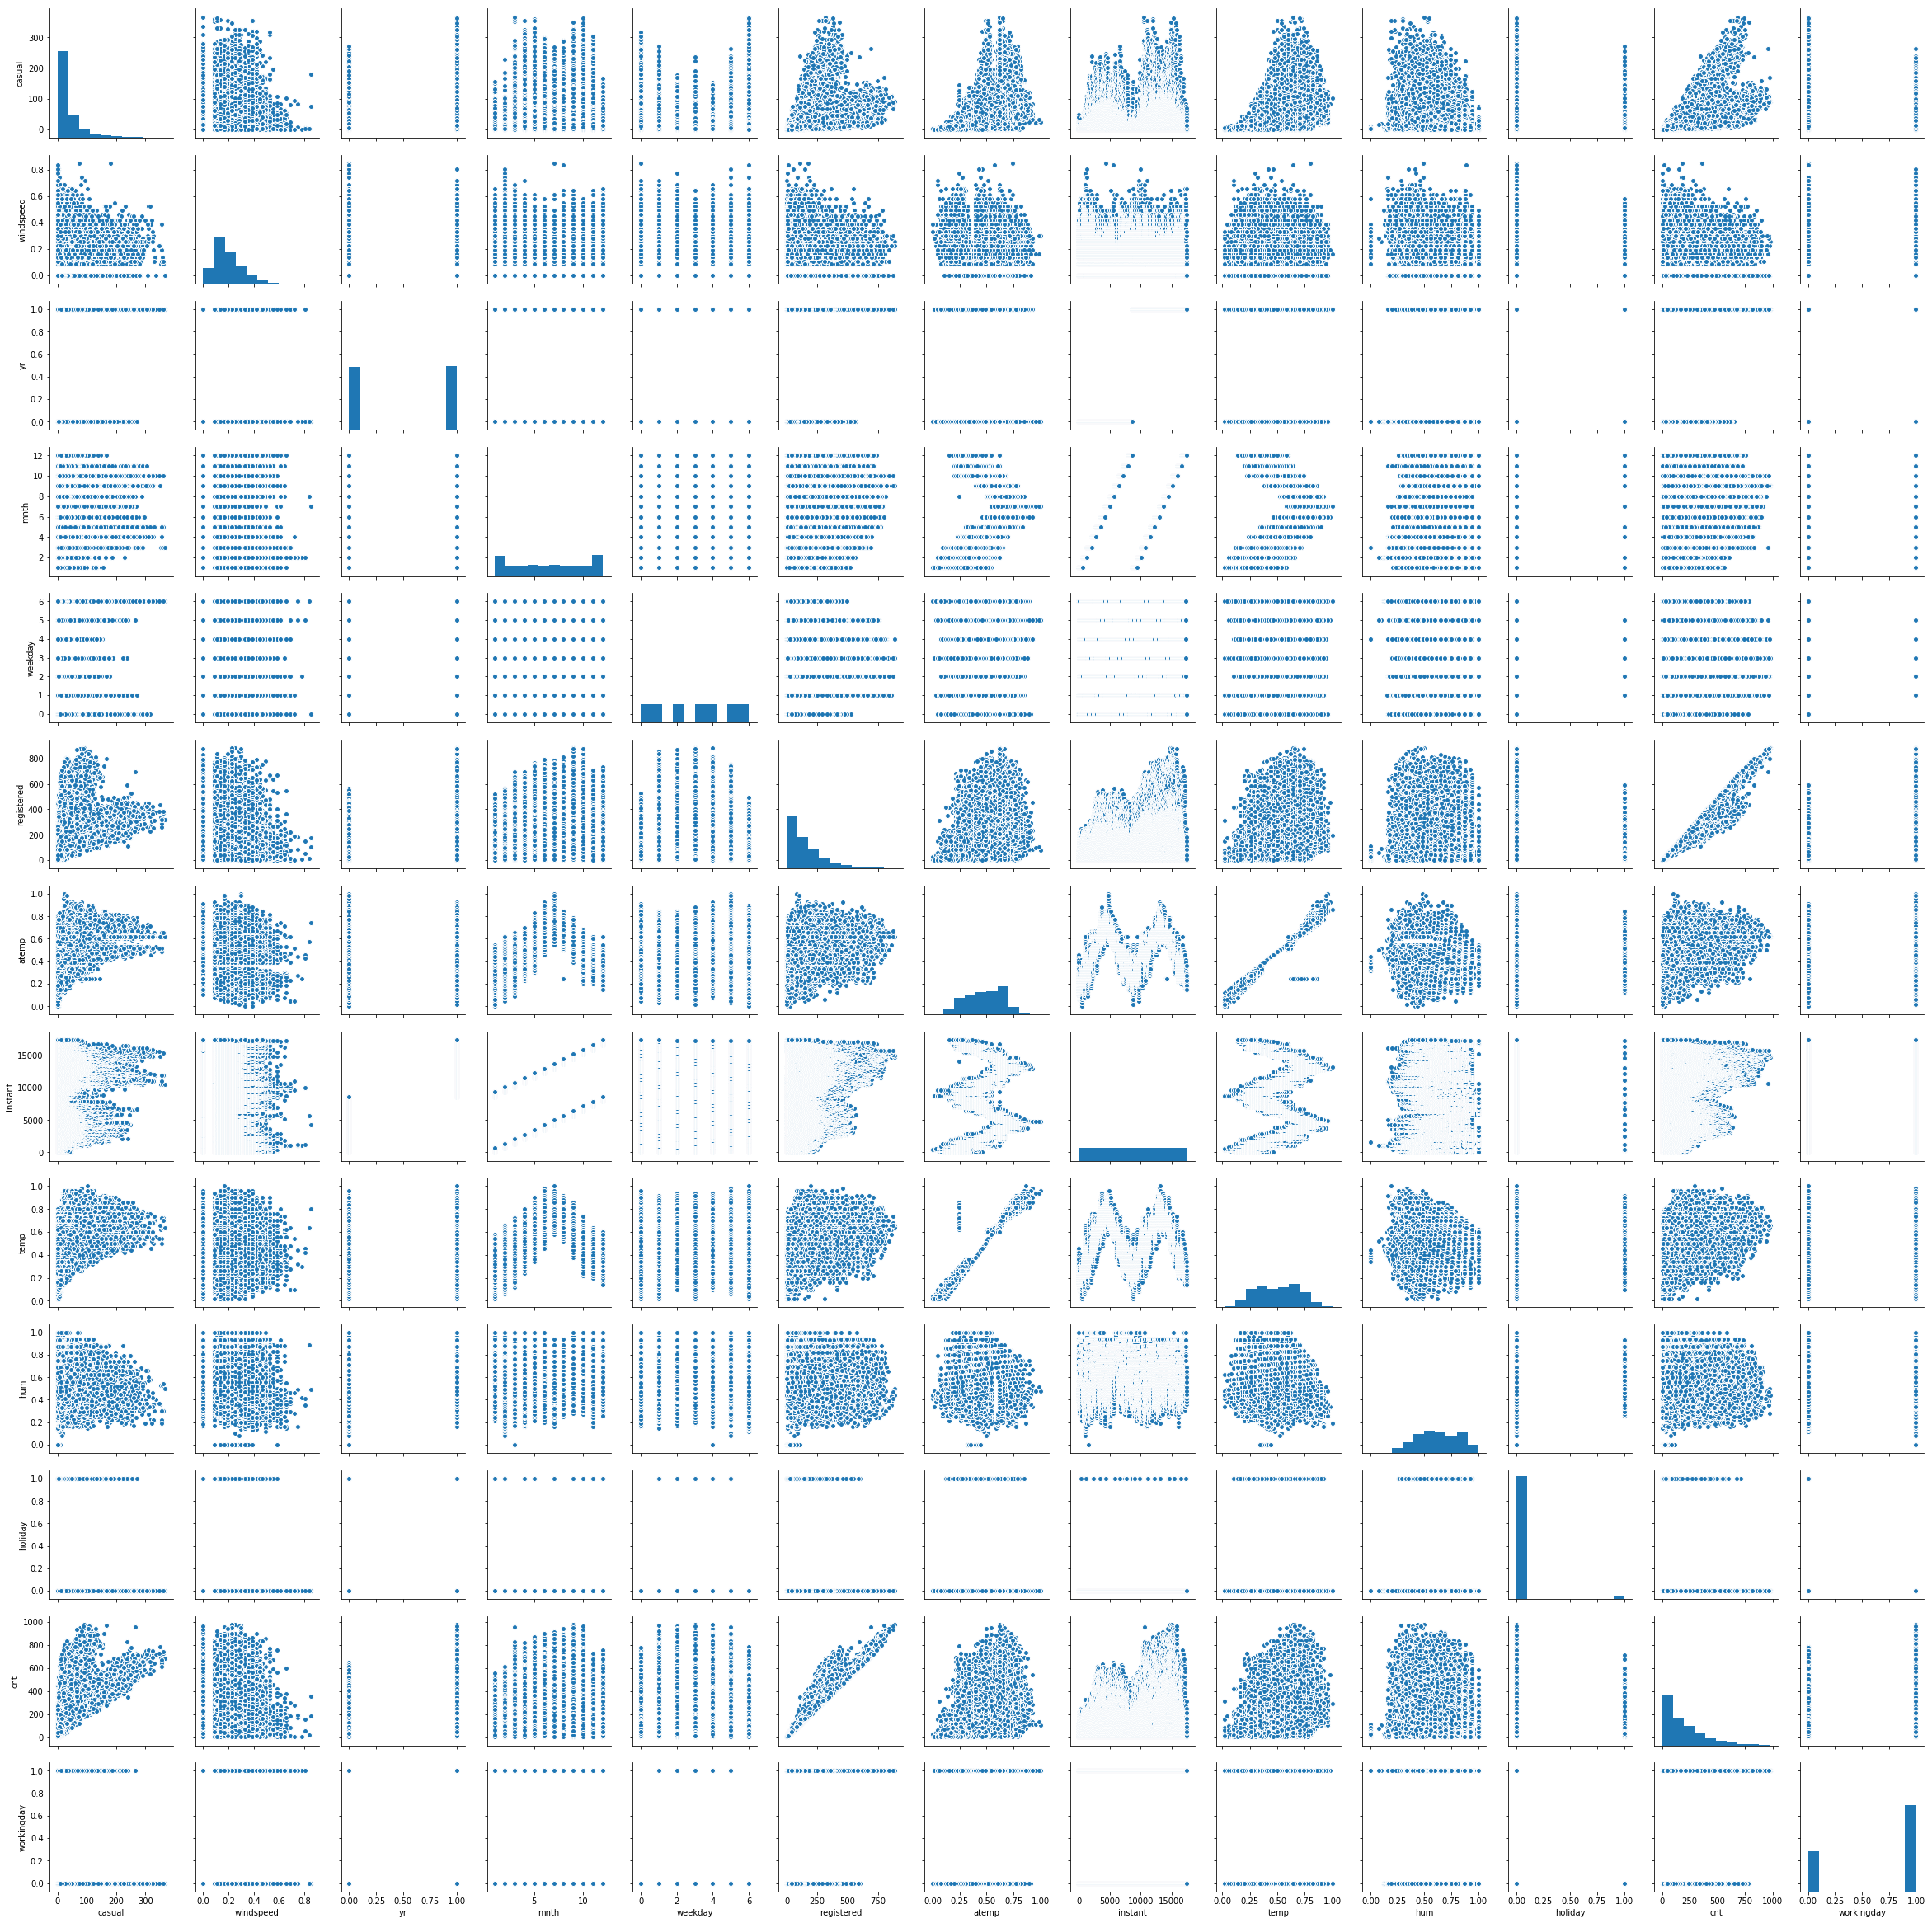

In [74]:
sns.pairplot(df2[num_feature])

### 3 graphs that I will choose are: 

1) Univariate Graph in which we get to know about casual and registered riders.

2) Countplot Graph of weathersit because we come to know about number of people that are permanent customers and use the   facility even in harsh weather conditions.

3) Multivariate graph because we got to know about the co variance and co relation of column that when value of one column goes up how does it effect the value of another columns.